# Project: Bankruptcy Prevention

## Business Objective:
This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df=pd.read_csv('bankruptcy-prevention.csv',sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [4]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [5]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [6]:
df.shape

(250, 7)

In [7]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
columns=[]
for col in df.columns:
     print(col)
     col=col.strip()
     columns.append(col)
        
df.columns=columns
print(col)

industrial_risk
 management_risk
 financial_flexibility
 credibility
 competitiveness
 operating_risk
 class
class


In [9]:
df.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
class                    2
dtype: int64

In [10]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [11]:
df.duplicated().sum()

147

## Applying label encoder

In [12]:
encode = LabelEncoder()
df['class'] = encode.fit_transform(df['class'])
df


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


# Visualization

## Boxplot 

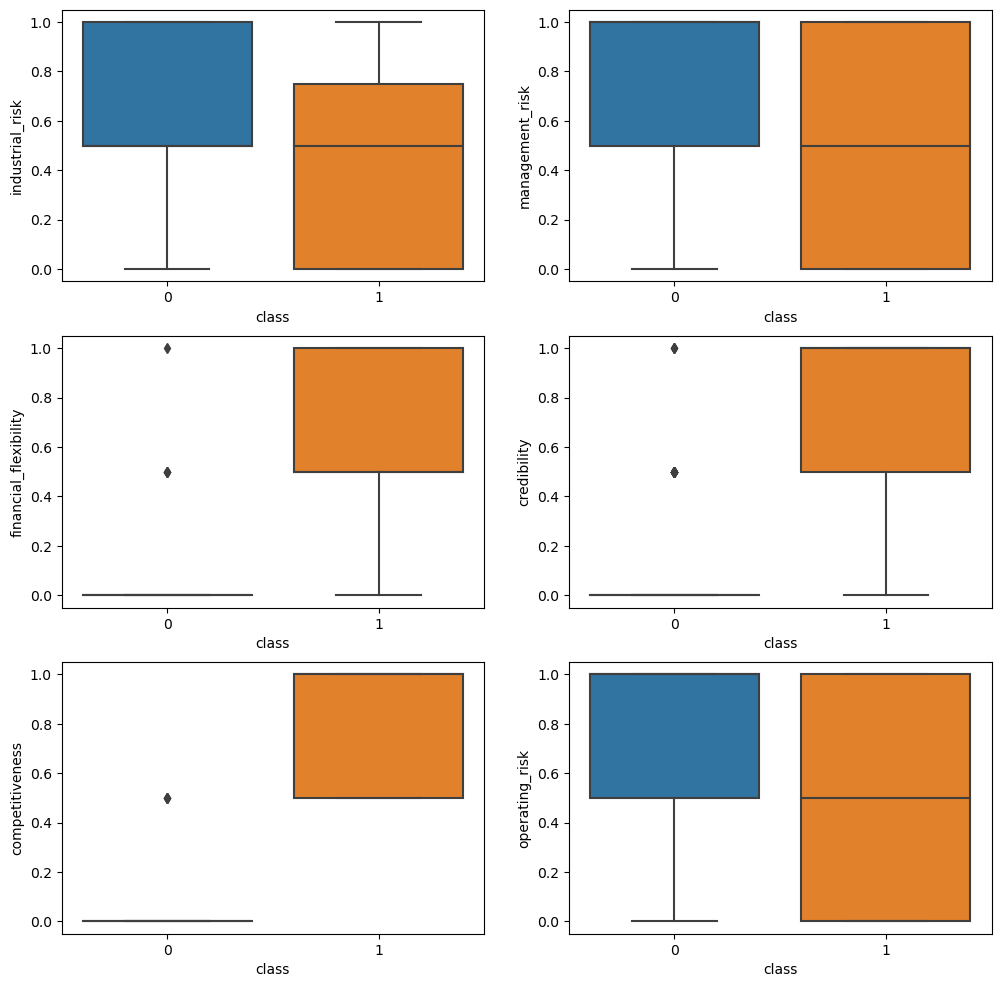

In [12]:
plt.figure(figsize=(12, 12))
for i, predictor in enumerate(df.drop(columns = ['class'])):
    ax = plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, x='class', y=predictor )
plt.show()

In [13]:
df['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

In [14]:
df['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [15]:
df['management_risk'].value_counts()

1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64

In [16]:
df['financial_flexibility'].value_counts()

0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64

In [17]:
df['credibility'].value_counts()

0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64

In [18]:
df['competitiveness'].value_counts()

0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64

In [19]:
df['operating_risk'].value_counts()

1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64

## Countplot

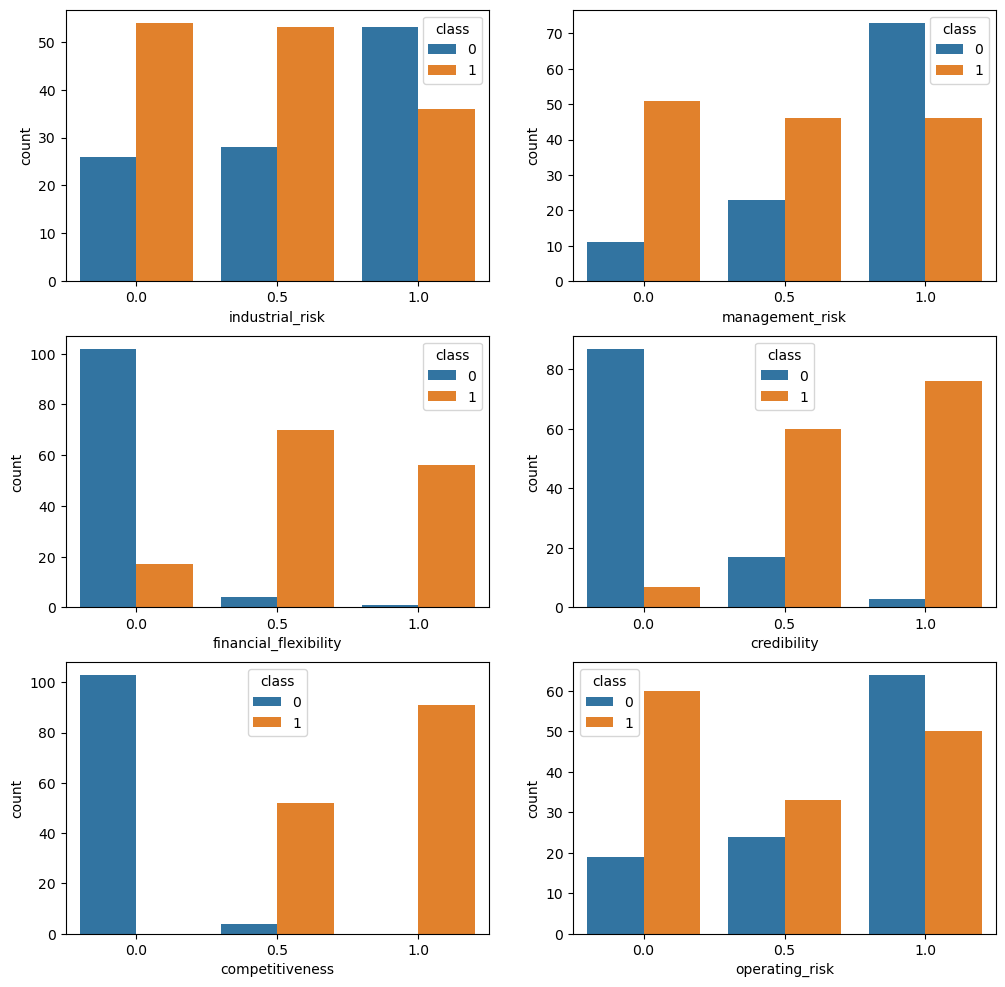

In [20]:
plt.figure(figsize=(12, 12))
for i, predictor in enumerate(df.drop(columns = ['class'])):
    ax = plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=predictor, hue='class')
plt.show()

## Countplot for class

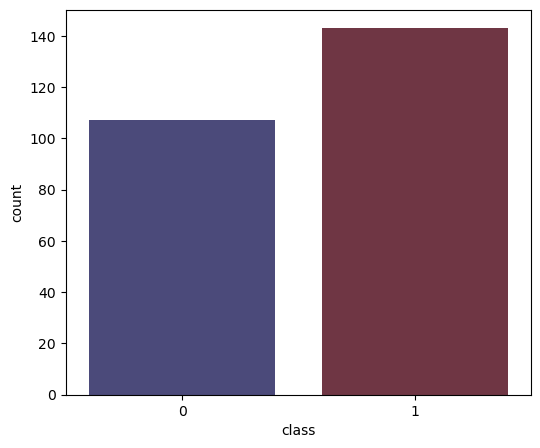

In [21]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['class'], palette='icefire', linewidth=5)
plt.show()

## Piechart

<AxesSubplot:ylabel='class'>

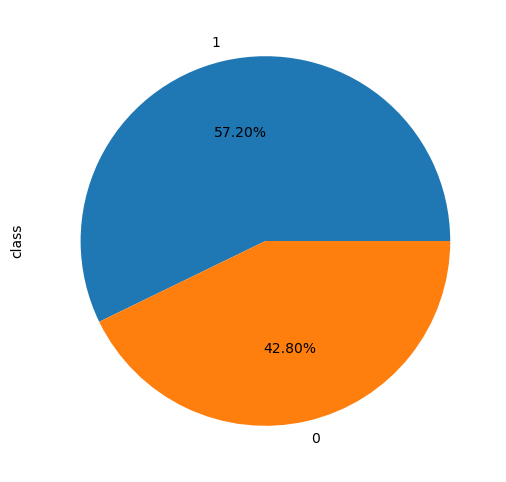

In [22]:
plt.figure(figsize=(12,6))
df['class'].value_counts().plot(kind="pie",autopct="%1.2f%%")

## Pairplot

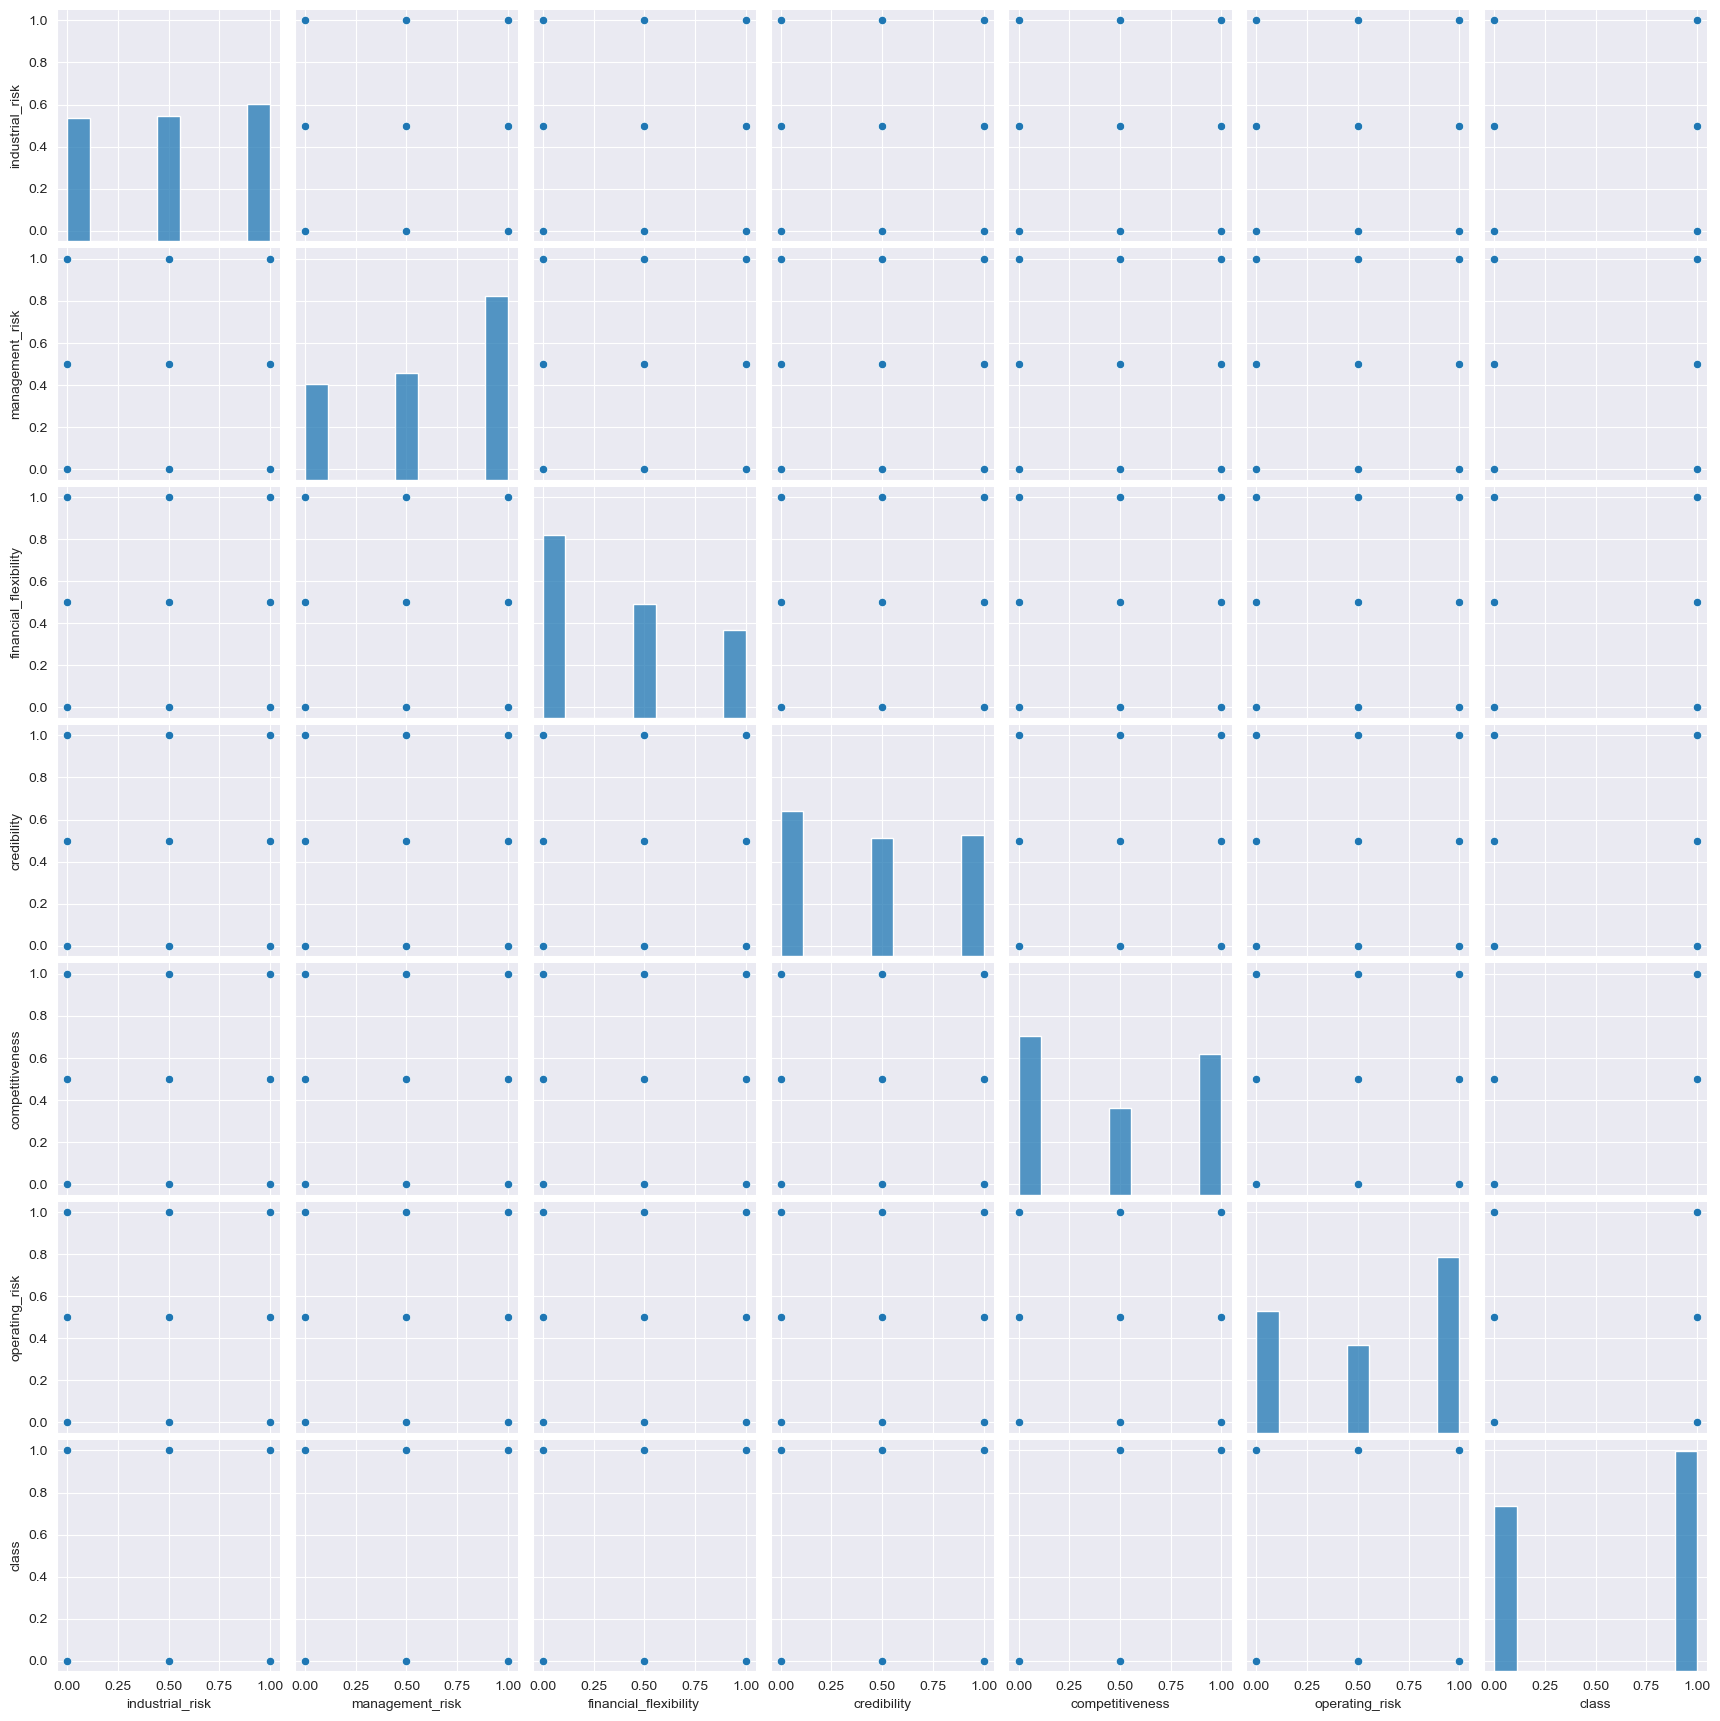

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

## Correlation Matrix

In [24]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<AxesSubplot:>

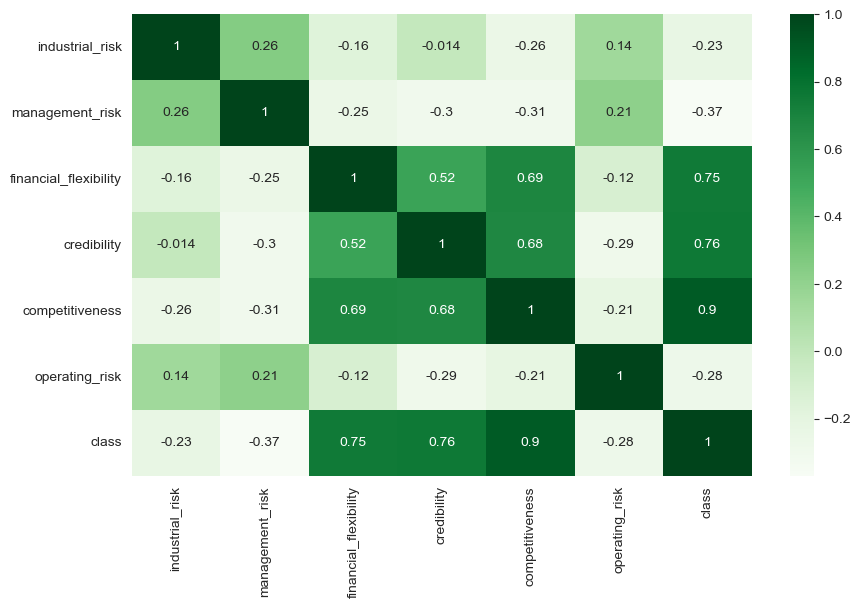

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Greens')

# Feature Engineering

In [13]:
y=df['class']
x=df.drop(['class'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.60,random_state=10)
X_train.shape,y_train.shape
X_test.shape,y_test.shape

((150, 6), (150,))

In [15]:
#Feature Scaling by Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train ,X_test

(array([[-1.19190632,  0.87210285, -0.91457444, -1.0972613 , -1.0533246 ,
          1.        ],
        [ 0.01203946,  0.87210285, -0.91457444,  1.36849443,  1.18779157,
         -0.11111111],
        [ 1.21598523,  0.87210285, -0.91457444,  0.13561657, -1.0533246 ,
         -0.11111111],
        [-1.19190632, -0.33915111,  1.59110895, -1.0972613 ,  1.18779157,
          1.        ],
        [ 1.21598523,  0.87210285, -0.91457444,  0.13561657, -1.0533246 ,
         -1.22222222],
        [-1.19190632, -0.33915111,  0.33826726,  1.36849443,  1.18779157,
         -1.22222222],
        [-1.19190632, -0.33915111, -0.91457444, -1.0972613 , -1.0533246 ,
         -0.11111111],
        [-1.19190632, -1.55040507,  0.33826726,  1.36849443,  0.06723349,
         -1.22222222],
        [ 0.01203946,  0.87210285, -0.91457444, -1.0972613 , -1.0533246 ,
          1.        ],
        [ 0.01203946, -0.33915111,  1.59110895,  1.36849443,  1.18779157,
         -0.11111111],
        [-1.19190632,  0.87210

In [16]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [17]:
model= ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.02121619 0.03186406 0.23304526 0.21508987 0.47706847 0.02171616]


In [18]:
d=pd.DataFrame({'Features':x.columns,'score':model.feature_importances_})
d

,Features,score
0,industrial_risk,0.021216
1,management_risk,0.031864
2,financial_flexibility,0.233045
3,credibility,0.215090
4,competitiveness,0.477068
5,operating_risk,0.021716


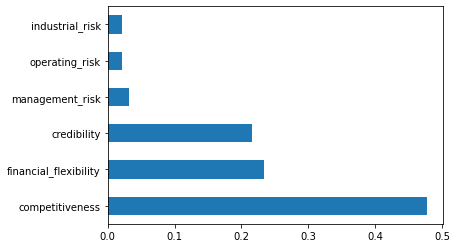

In [19]:
Feature = pd.Series(model.feature_importances_, index = x.columns)
Feature.nlargest(6).plot(kind = 'barh')
plt.show()

<AxesSubplot:>

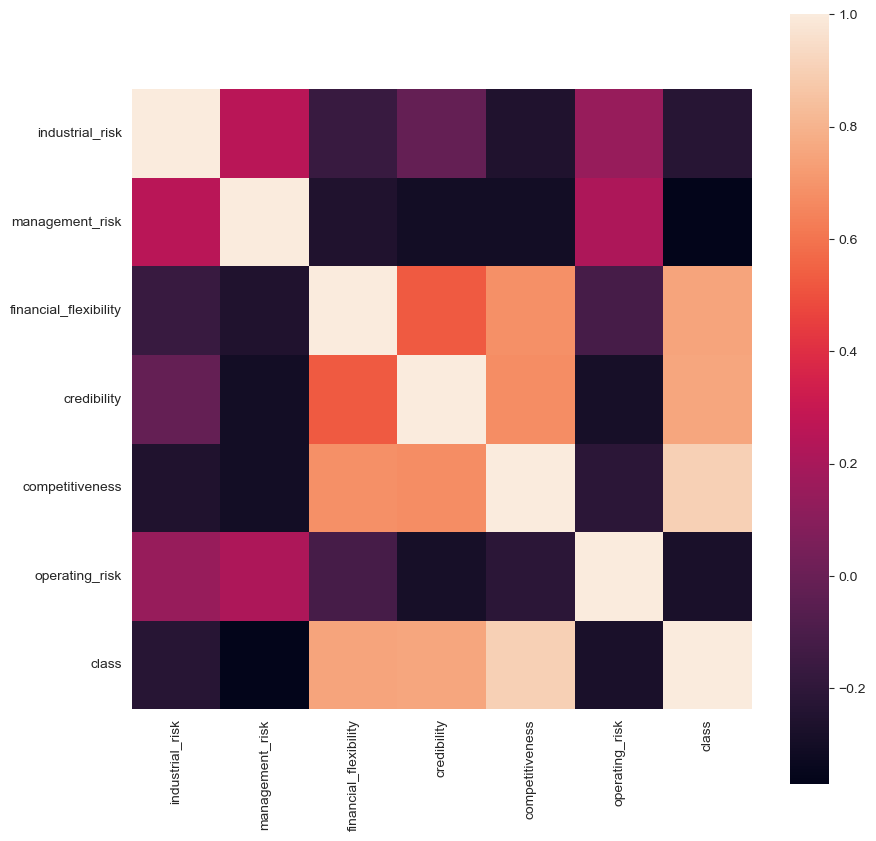

In [32]:
plt.figure(figsize=(10,10))
corrmat = df.corr()
sns.heatmap(corrmat, vmax=1.0, square=True)

# Model Building

# 1.Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve

In [21]:
# performing logistic regression
logmodel=LogisticRegression()

In [22]:

logmodel.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred=logmodel.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [24]:
#classification Report
acc1 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc1)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy = 0.9933333333333333


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

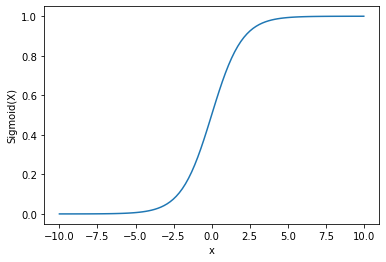

In [28]:
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

Text(0.5, 25.11597222222222, 'Predicted label')

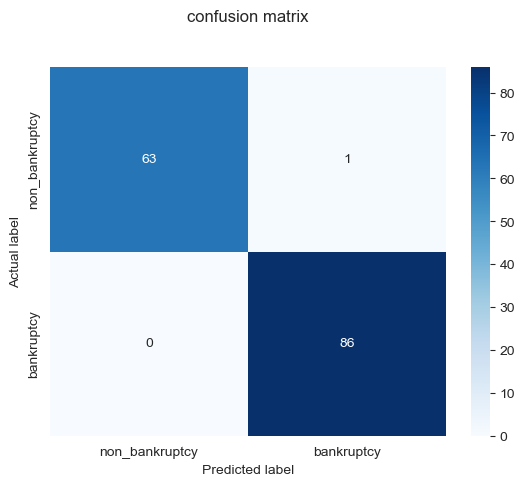

In [39]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 2.Support Vector Machine

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [41]:
clf = SVC()

kernel: 'poly'
parameters ={'kernel':['rbf'],
              'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
                         'kernel': ['rbf']})

In [42]:
gsv.best_params_

{'C': 50, 'gamma': 0.5, 'kernel': 'rbf'}

In [43]:
gsv.best_score_

1.0

In [44]:
model = SVC(C = 50, gamma =0.5, kernel='rbf')
model.fit(X_train , y_train)

SVC(C=50, gamma=0.5)

In [45]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [46]:
from sklearn.calibration import CalibratedClassifierCV
svm = SVC(C = 50, gamma = 0.5)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:,1]

In [47]:
#predict probab estimates
y_prob

array([0.44278898, 0.93895867, 0.58298901, 0.91657528, 0.55516063,
       0.94213701, 0.80488002, 0.08991626, 0.8997386 , 0.55516063,
       0.91782282, 0.88213183, 0.88076052, 0.94784409, 0.07227991,
       0.92371332, 0.09077767, 0.94774812, 0.87711955, 0.07562688,
       0.07458243, 0.92675729, 0.91890202, 0.94948411, 0.92675729,
       0.07009041, 0.14956357, 0.34287766, 0.92698226, 0.09319516,
       0.93877031, 0.94133543, 0.58298901, 0.93895867, 0.88213183,
       0.1063326 , 0.9436124 , 0.07458243, 0.07227991, 0.08799192,
       0.12474523, 0.93093454, 0.09223263, 0.92698226, 0.94481307,
       0.09319516, 0.92237   , 0.94481307, 0.94280356, 0.0736682 ,
       0.88261955, 0.08676079, 0.84288993, 0.08676079, 0.1063326 ,
       0.94976784, 0.92333025, 0.92162047, 0.58298901, 0.08799192,
       0.87711955, 0.07009041, 0.9080595 , 0.95973251, 0.09077767,
       0.92237   , 0.07024935, 0.85078902, 0.09319516, 0.94519055,
       0.14956357, 0.07024935, 0.92833932, 0.93117245, 0.08991

In [48]:
acc2 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        64
           1       0.91      1.00      0.96        86

    accuracy                           0.95       150
   macro avg       0.96      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150

Accuracy = 0.9466666666666667


Text(0.5, 25.11597222222222, 'Predicted label')

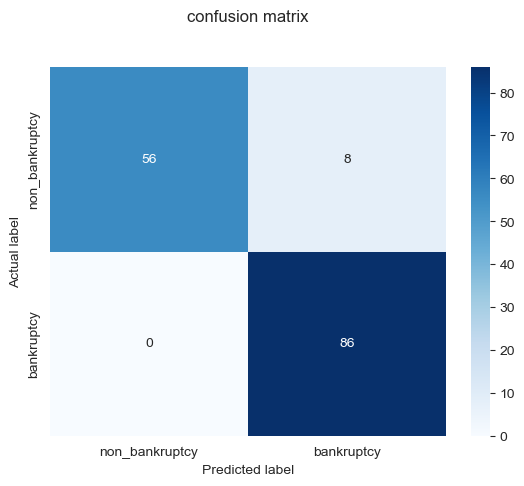

In [49]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 3.Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [52]:
final_model = grid_search.best_estimator_
final_model


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='auto',
                       random_state=1024)

In [53]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5, max_features='auto', random_state=1024)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='auto', random_state=1024)

In [54]:
#Predicting on test data
y_pred = dt_model.predict(X_test) # predicting on test data set 
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [55]:
y_prob=dt_model.predict_proba(X_test)[:,1]
y_prob

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.])

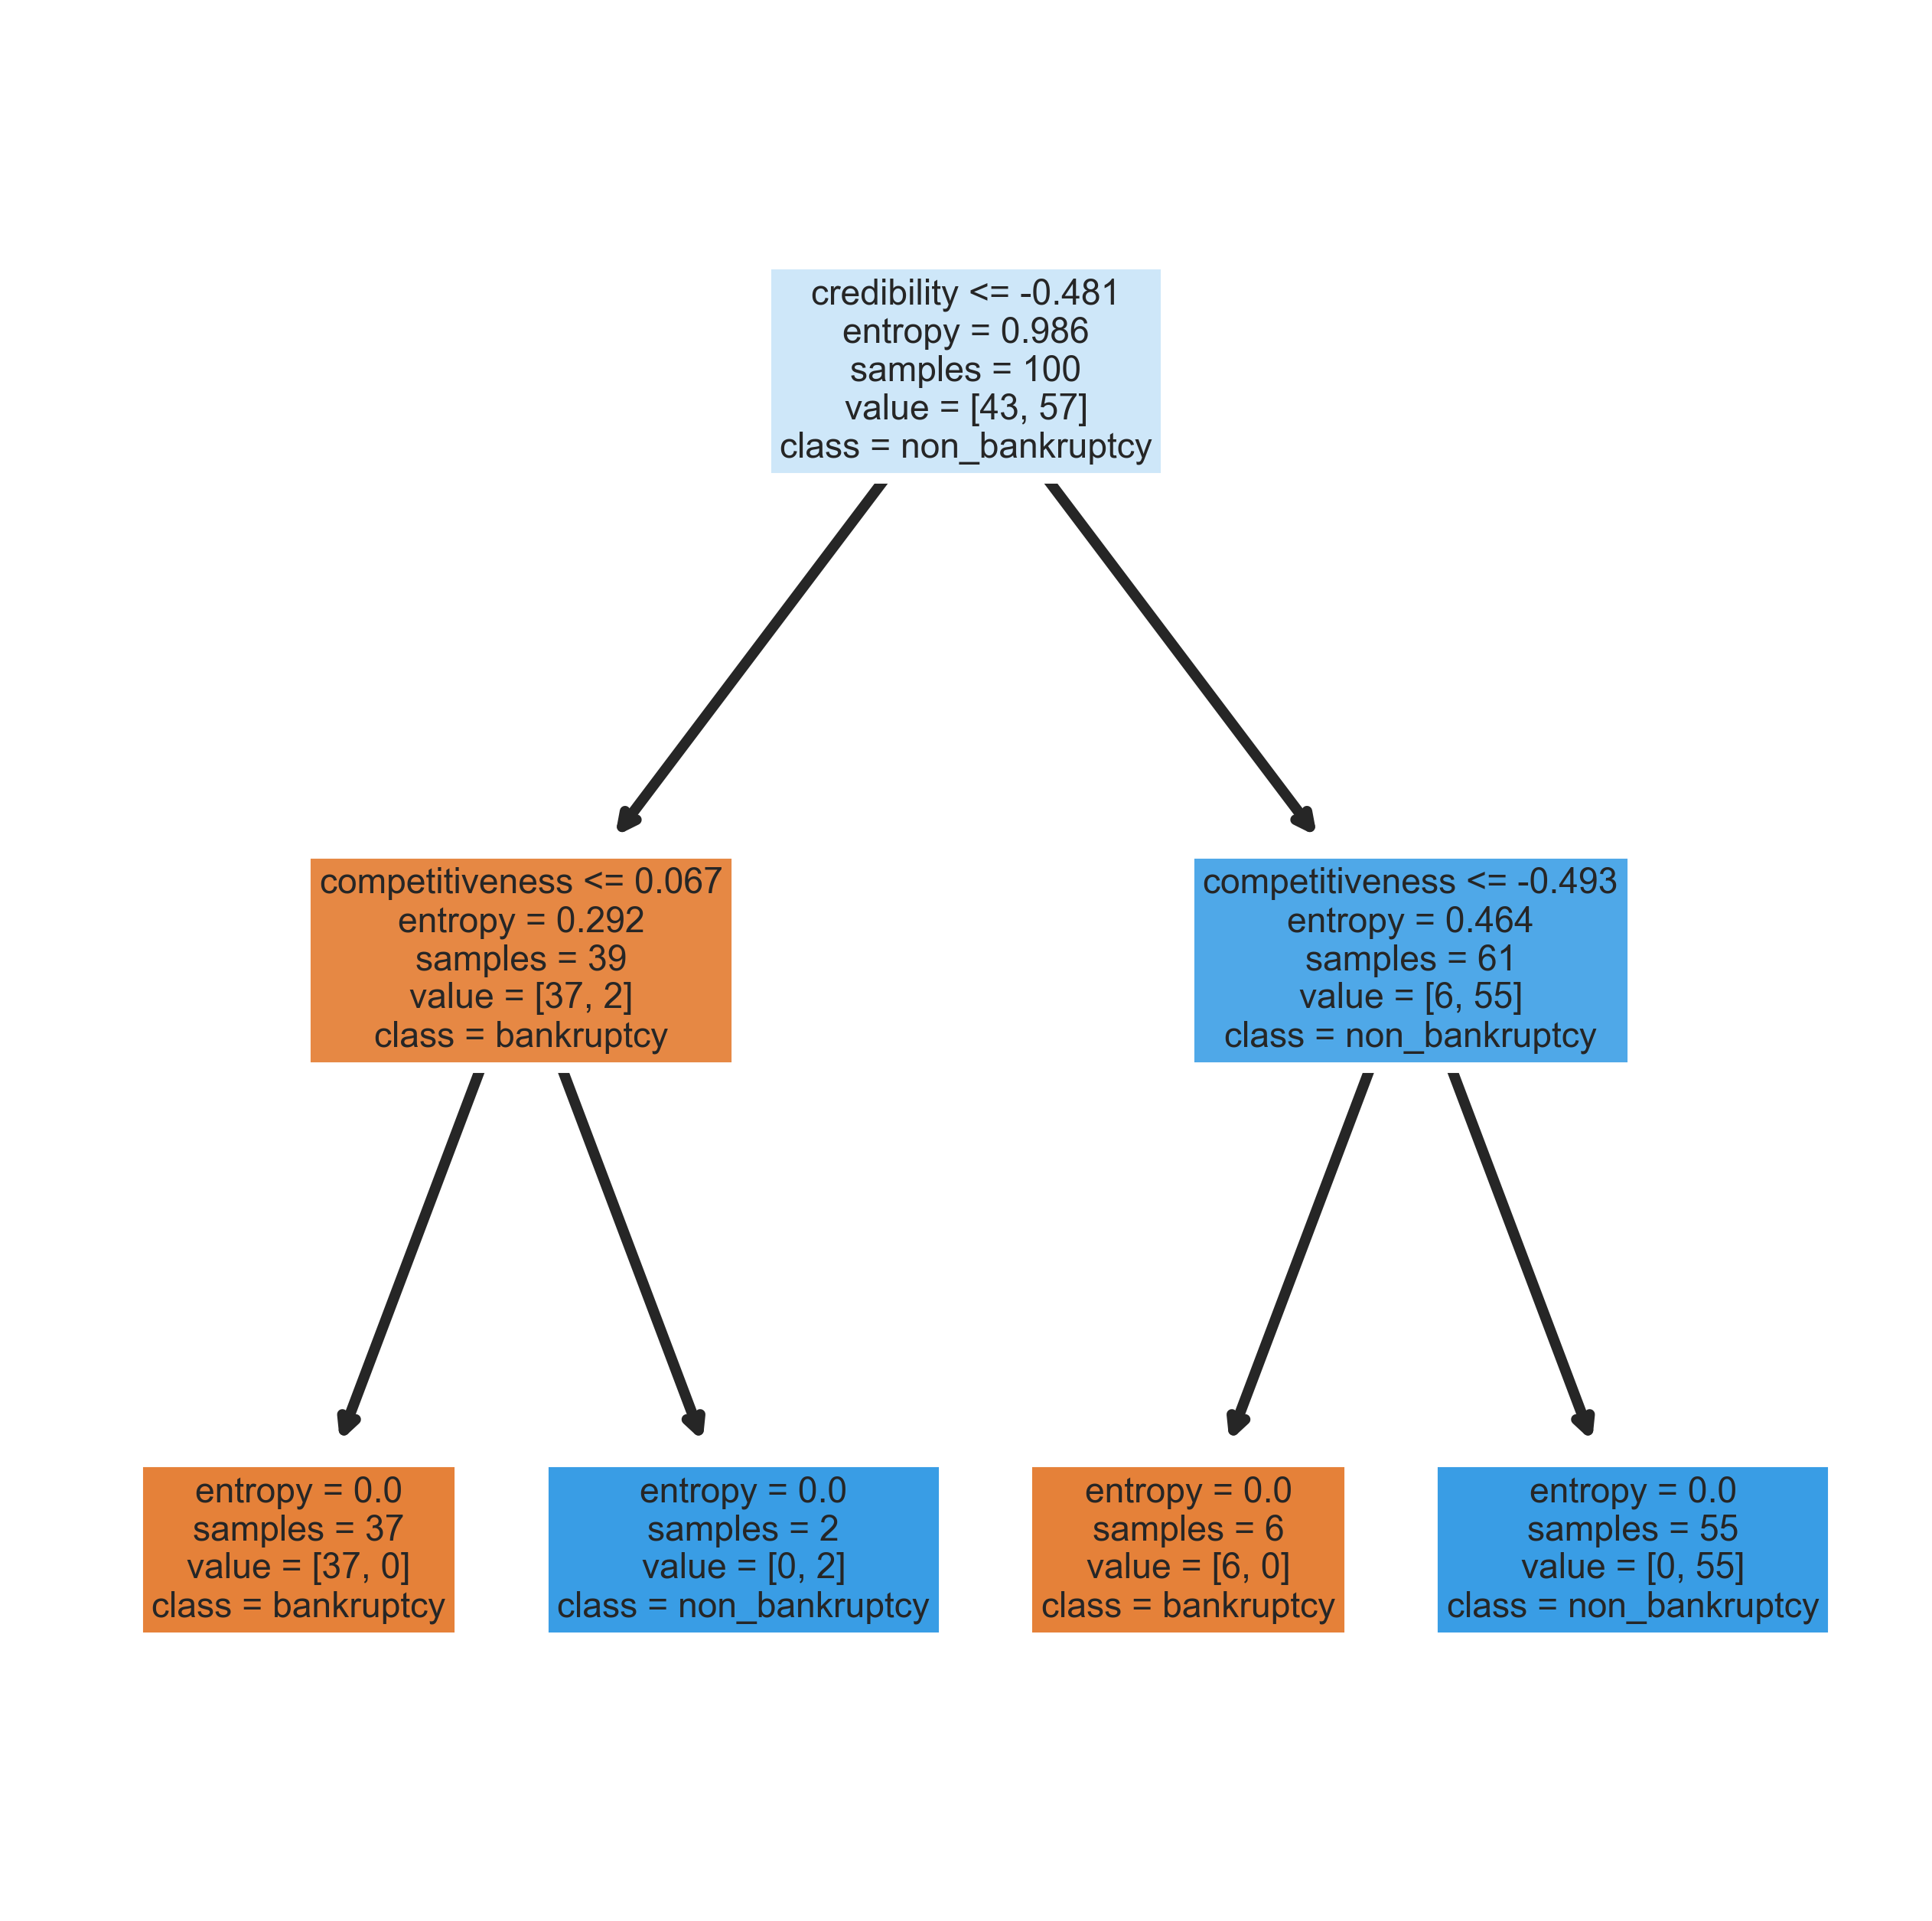

In [56]:
fn=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk','class']
cn=['bankruptcy','non_bankruptcy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [57]:
acc3 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.99      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy = 0.9933333333333333


Text(0.5, 25.11597222222222, 'Predicted label')

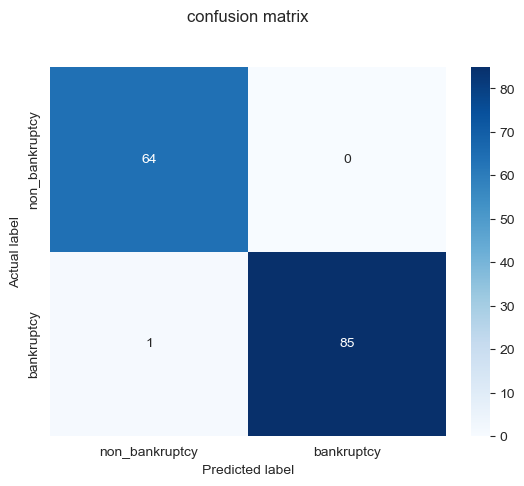

In [58]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Decision Tree ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 4.Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc=RandomForestClassifier(random_state=42)

In [61]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [62]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [63]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [64]:
rfc_model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=4, 
                                   criterion='gini')

In [65]:
rfc_model

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

In [66]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

In [67]:
#Predicting on test data
y_pred = rfc_model.predict(X_test) # predicting on test data set 
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [68]:
acc4 = accuracy_score(y_test, y_pred)
print('Classification Report : \n',classification_report(y_test, y_pred))
print('='*50)
print('Accuracy =',acc4)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        86

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy = 1.0


Text(0.5, 25.11597222222222, 'Predicted label')

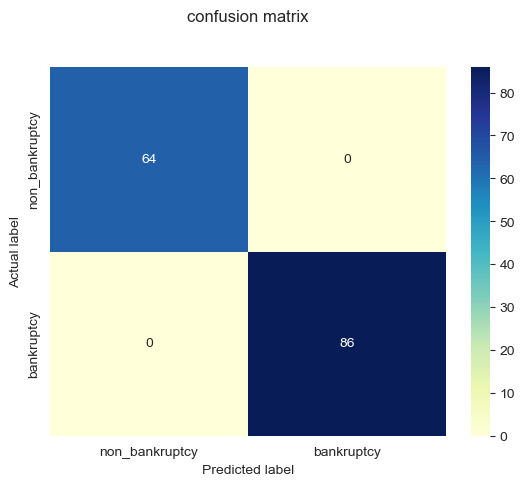

In [69]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 5.K-nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [72]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [73]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [74]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [75]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [76]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
#Predicting on test data
y_pred = knn_model.predict(X_test) # predicting on test data set 
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [78]:
y_prob=knn_model.predict_proba(X_test)[:,1]
y_prob

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.])

In [79]:
acc5 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc5)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy = 0.9933333333333333


Text(0.5, 25.11597222222222, 'Predicted label')

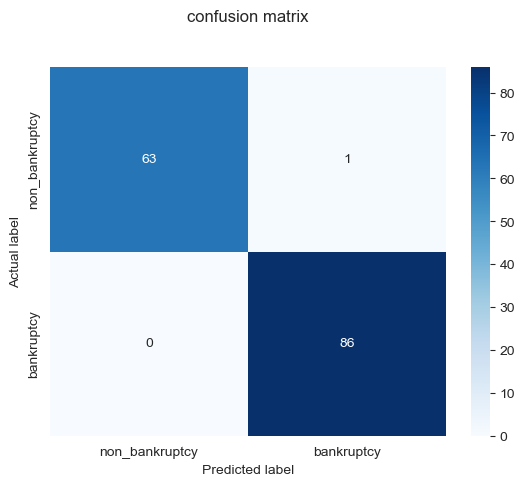

In [80]:
#Confusion Matrix 
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for KNN ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# • ANN MODELLING

In [118]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled,y, test_size=0.2, random_state=42)



import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



# Evaluate the model on the test set
loss, acc6 = model.evaluate(X_test, y_test)

Epoch 1/10
7/7 [==============================] - 2s 33ms/step - loss: 0.6214 - accuracy: 0.7200 - val_loss: 0.5972 - val_accuracy: 0.8800
Epoch 2/10
7/7 [==============================] - 0s 12ms/step - loss: 0.5548 - accuracy: 0.8500 - val_loss: 0.5337 - val_accuracy: 0.9400
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4921 - accuracy: 0.9300 - val_loss: 0.4724 - val_accuracy: 0.9800
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4342 - accuracy: 0.9400 - val_loss: 0.4167 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3818 - accuracy: 0.9700 - val_loss: 0.3653 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3333 - accuracy: 0.9800 - val_loss: 0.3184 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2895 - accuracy: 0.9900 - val_loss: 0.2762 - val_accuracy: 1.0000
Epoch 8/10
7/7 [===========

In [82]:
print('Test accuracy:', acc6)

Test accuracy: 1.0


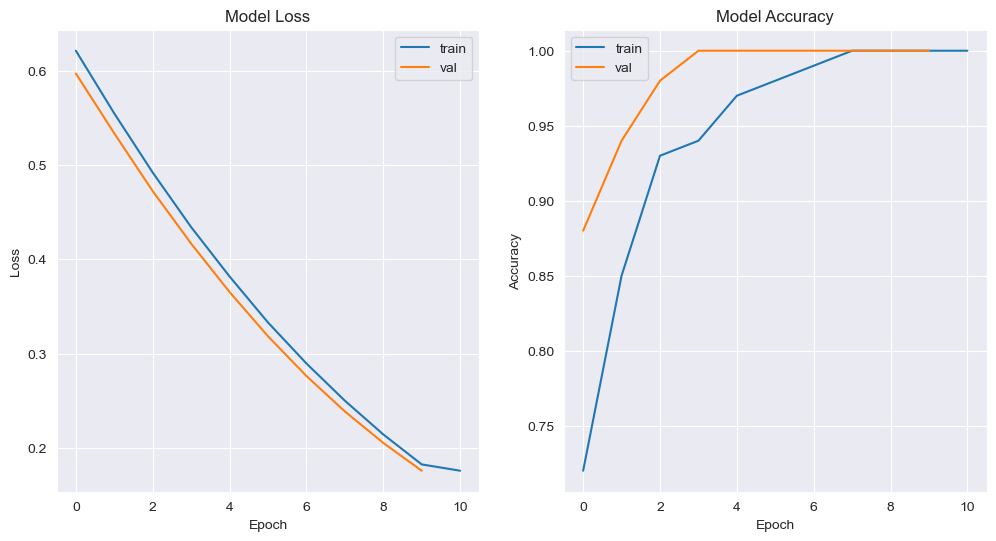

In [119]:
import matplotlib.pyplot as plt

# define lists for storing the training and validation loss and accuracy
train_loss = [0.6214,0.5548,0.4921,0.4342,0.3818,0.333,0.2895,0.2500,0.2142,0.1824,0.1757] 
val_loss = [0.5972,0.5337,0.4724,0.4167,0.3653,0.3184,0.2762,0.2386,0.2052,0.1757]
train_acc = [0.7200,0.8500,0.9300,0.9400,0.9700,0.9800,0.9900,1.000,1.000,1.000,1.000] 
val_acc = [0.8800,0.9400,0.9800,1.0,1.0,1.0,1.0,1.0,1.0,1.0] 
# create the figure and axis objects
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot the loss over epochs
ax[0].plot(train_loss, label='train')
ax[0].plot(val_loss, label='val')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# plot the accuracy over epochs
ax[1].plot(train_acc, label='train')
ax[1].plot(val_acc, label='val')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# display the plot
plt.show()


# • ENSEMBLE

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(random_state=42)
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [84]:
from sklearn.metrics import f1_score
rf_pred = rf_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression F1 Score:", logreg_f1)

Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Logistic Regression Accuracy: 1.0
Logistic Regression F1 Score: 1.0


In [85]:
ensemble_pred = np.round((rf_pred + logreg_pred)/2)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

print("Ensemble Accuracy:", ensemble_acc)
print("Ensemble F1 Score:", ensemble_f1)

Ensemble Accuracy: 1.0
Ensemble F1 Score: 1.0


# • AdaBoost

In [86]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [87]:
seed=10
num_trees=30

In [120]:
kfold=model_selection.KFold(n_splits=5)
model=AdaBoostClassifier(n_estimators=num_trees)
results1=model_selection.cross_val_score(model,x,y,cv=kfold)
print(results1.mean())

0.9879999999999999


# • XGBoost

In [89]:
!pip install xgboost

In [90]:
from sklearn import svm
from xgboost import XGBClassifier

In [91]:
clf=XGBClassifier()

In [121]:
kfold=model_selection.KFold(n_splits=5)
model=XGBClassifier(n_estimators=num_trees)
results2=model_selection.cross_val_score(model,x,y,cv=kfold)
print(results2.mean())

0.984


# • Stacking

In [93]:
import numpy as np
import warnings
from mlxtend.classifier import StackingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')

In [94]:
clf1=KNeighborsClassifier(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2,clf3],use_probas=True,meta_classifier=lr)

In [95]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=model_selection.cross_val_score(clf,x,y,cv=3,scoring='f1_macro')
    print("f1 Scores:%0.2f (+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))

3-fold cross validation:

f1 Scores:0.99 (+/- 0.01)[KNN]
f1 Scores:0.99 (+/- 0.01)[Random_forest]
f1 Scores:0.97 (+/- 0.02)[Naive_bayes]
f1 Scores:0.99 (+/- 0.01)[StackingClassifier]


# • Bagging

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [97]:
bagging_clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,max_features=5,random_state=42)

In [98]:
bagging_clf.fit(X_train,y_train).score(X_test,y_test)

1.0

In [126]:
data = {"MODEL":pd.Series(["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","KNN","ANN","Ensemble","ADABOOST","XGBOOST","STACKING","BAGGING"]),"Accuracy":pd.Series([acc1,acc2,acc3,acc4,acc5,acc6,ensemble_acc,results1.mean(),results2.mean(),scores.mean(),bagging_clf.fit(X_train,y_train).score(X_test,y_test)])}
Accuracy_table=pd.DataFrame(data)
Accuracy_table.sort_values(by='Accuracy')

,MODEL,Accuracy
1,Support Vector Machine,0.946667
8,XGBOOST,0.984000
7,ADABOOST,0.988000
9,STACKING,0.991791
0,Logistic Regression,0.993333
2,Decision Tree,0.993333
4,KNN,0.993333
3,Random Forest,1.000000
5,ANN,1.000000
6,Ensemble,1.000000


# DEPLOYMENT

In [101]:
import pickle
import warnings
warnings.filterwarnings('ignore')

In [102]:
pickle.dump(logmodel,open('model.pkl','wb'))

In [103]:
 !pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.1/340.1 kB 3.7 MB/s eta 0:00:00a 0:00:01

In [104]:
import streamlit as st
model = pickle.load(open('model.pkl','rb'))

In [136]:
def predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk):
    input(np.array([[industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk]]).astype(np.float64))
    prediction = model.predict_proba(input)
    pred = '{0:.{1}f}'.format(prediction[0][0],2)
    return float(pred)

In [137]:
def main():
    st.title('Bankruptcy prediction')
    html_temp = """
    <div style = "background-color: yellow; padding: 10px">
    <h2 style = "color:white; text-align: center;"> BANKRUPTCY PREDICTION APP <\h2>
    <\div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)
    
    industrial_risk = st.text_input('INDUSTRIAL RISK' , 'Type Here')
    management_risk = st.text_input('MANAGEMENT RISK' , 'Type Here')
    financial_flexibility = st.text_input('FINANCIAL FLEXIBILITY' , 'Type Here')
    credibility = st.text_input('CREDIBILITY' , 'Type Here')
    competitiveness = st.text_input('COMPETITIVENESS' , 'Type Here')
    operating_risk = st.text_input('OPERATING RISK' , 'Type Here')
    
    safe_html = """
    <div style = "background-color: green; padding: 10px">
    <h2 style = "color:black; text-align: center;"> Company is safe! <\h2>
    <\div>
    """
    danger_html = """
    <div style = "background-color:red ; padding: 10px">
    <h2 style = "color:black; text-align: center;"> Your company is going to be bankrupt. <\h2>
    <\div>
    """
    
    if st.button('Predict'):
        output = predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk)
        st.success('The Probability of the company going bankrupt is {}'.format(output))
        
        if output > 0.5:
            st.markdown(danger_html,unsafe_allow_html=True)
        else:
             st.markdown(safe_html,unsafe_allow_html=True)

                
if __name__ == ' __main__ ':
    main()